## MOVIE INDUSTRY ANALYSIS (1980-2020)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#import data
df=pd.read_csv(r"C:\Users\ajoal\OneDrive\Desktop\movie.csv")
df1=df

In [4]:
df1.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Basic Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   country   7665 non-null   object 
 9   budget    5497 non-null   float64
 10  gross     7479 non-null   float64
 11  company   7651 non-null   object 
 12  runtime   7664 non-null   float64
dtypes: float64(4), object(9)
memory usage: 778.9+ KB


In [6]:
df1.describe()

,votes,budget,gross,runtime
count,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
#Number of rows and columns
df1.shape

(7668, 13)

### Data Cleaning

In [8]:
#Check for duplicates
df1[df1.duplicated()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime


In [9]:
#check for missing values
df1.isnull().sum()

name           0
rating        77
genre          0
released       2
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
#Check for missing values in budget and gross
print(df1['budget'].isnull().sum())
print(df1['gross'].isnull().sum())

2171
189


In [11]:
#Drop the rows that have missing values in budget and gross
df1 = df1.dropna(subset=['budget'])
df1 = df1.dropna(subset=['gross'])

In [12]:
#check whether it is removed
print(df1['budget'].isnull().sum())
print(df1['gross'].isnull().sum())

0
0


In [13]:
# Fill missing values in ratings and company columns with "Unknown"
df1['rating'] = df1['rating'].fillna("Unknown")
df1['company'] = df1['company'].fillna("Unknown")

In [14]:
# Fill runtime with median runtime
df1['runtime'] = df1['runtime'].fillna(df1['runtime'].median())

In [15]:
df1[df1['country'].isnull()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [16]:
#Fill country of clinton road movie as united states
df1['country'] = df1['country'].fillna("United States")

In [17]:
df1[df1['name']=='Clinton Road']

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,United States,2500000.0,50400.0,Growing Tree Productions,77.0


In [18]:
#All missing values has been populated
df1.isnull().sum()

name        0
rating      0
genre       0
released    0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [19]:
#Data Types of each column
df1.dtypes

name         object
rating       object
genre        object
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
#Change the data type of budget and gross
df1['budget']=df1['budget'].astype('int64')
df1['gross']=df1['gross'].astype('int64')

In [21]:
#Verify the change
df1.dtypes

name         object
rating       object
genre        object
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [22]:
#Convert release_date to datetime
df1['released'] = pd.to_datetime(df1['released'])

In [23]:
#Extract year and month from released
df1['release_year'] = df1['released'].dt.year
df1['release_month'] = df1['released'].dt.month_name()

In [24]:
#Drop the row where year is 1905 because it is not informative to the dataset 
df1 = df1.drop(df1[df1['release_year'] == 1905].index)

In [25]:
#Add new columns profit and roi
df1['profit'] = df1['gross'] - df1['budget']
df1['roi'] = df1['profit'] / df1['budget']

In [26]:
#New number of rows and columns
df1.shape

(5431, 17)

In [27]:
#Cleaned dataset
df1.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_month,profit,roi
0,The Shining,R,Drama,1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,27998772,1.473620
1,The Blue Lagoon,R,Adventure,1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,54353106,12.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,520375067,28.909726
3,Airplane!,PG,Comedy,1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,79953539,22.843868
4,Caddyshack,R,Comedy,1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,33846344,5.641057


### Exploratory Data Analysis

In [28]:
#Total number of movies released each year
df1.groupby('release_year')[['release_year']].count().rename(columns={'release_year': 'movie_count'})

,movie_count
release_year,
1980,36
1981,54
1982,70
1983,86
1984,89
1985,95
1986,98
1987,104
1988,120


In [29]:
#Number of movies each genre has
df['genre'].value_counts()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

In [30]:
#Top ten companies with high gross
df1.groupby('company')[['gross']].sum().sort_values('gross', ascending=False).rename(columns={'gross': 'average_gross'}).head(10)

,average_gross
company,
Warner Bros.,54773202654
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19628786232
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [31]:
#Top ten companies with high average gross
df1.groupby('company')[['gross']].mean().sort_values('gross', ascending=False).rename(columns={'gross': 'average_gross'}).head(10)

,average_gross
company,
Marvel Studios,1.255466e+09
Illumination Entertainment,1.097122e+09
Fairview Entertainment,9.665549e+08
B24,8.806815e+08
Avi Arad Productions,8.560852e+08
Chris Morgan Productions,7.590569e+08
Jolie Pas,7.584118e+08
Lucasfilm,7.185352e+08
Marvel Entertainment,7.144215e+08


In [32]:
#Total profit and average profit that movie industry had per year since 1980
df1.groupby('release_year')[['profit']].agg(['mean','sum']).head()

profit            
                      mean         sum
release_year                          
1980          3.541366e+07  1274891719
1981          1.935896e+07  1045384042
1982          2.803257e+07  1962280086
1983          1.664390e+07  1431375554
1984          2.162928e+07  1925006263

In [33]:
#Top ten highest grossing movies
df1.sort_values('gross', ascending=False).head(10)[['name','gross']].set_index('name')

,gross
name,
Avatar,2847246203
Avengers: Endgame,2797501328
Titanic,2201647264
Star Wars: Episode VII - The Force Awakens,2069521700
Avengers: Infinity War,2048359754
The Lion King,1670727580
Jurassic World,1670516444
The Avengers,1518815515
Furious 7,1515341399


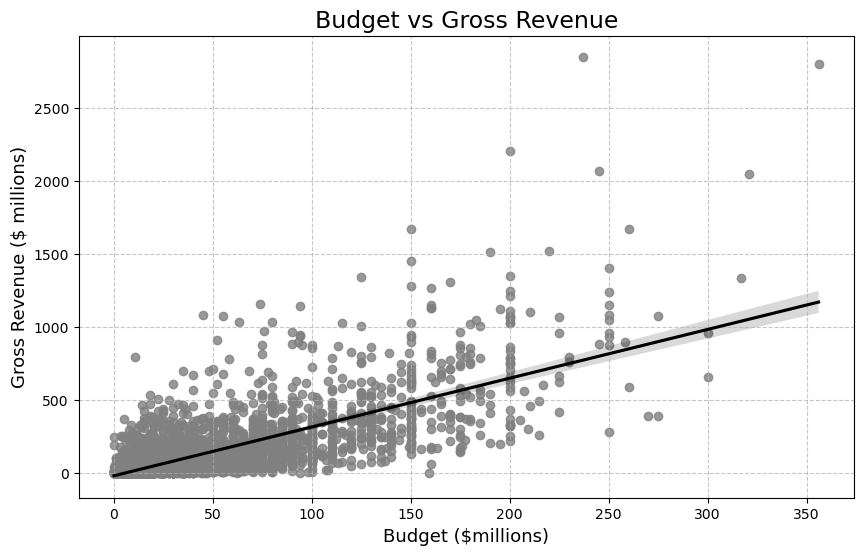

In [34]:
#Plot budget vs gross
plt.figure(figsize=(10,6))
sns.regplot(x=df1['budget']/1e6, y=df1['gross']/1e6, data=df1, scatter_kws={'color':'grey'}, line_kws={'color':'black'})
plt.title('Budget vs Gross Revenue',fontsize=17)
plt.xlabel('Budget ($millions)',fontsize=13)
plt.ylabel('Gross Revenue ($ millions)',fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

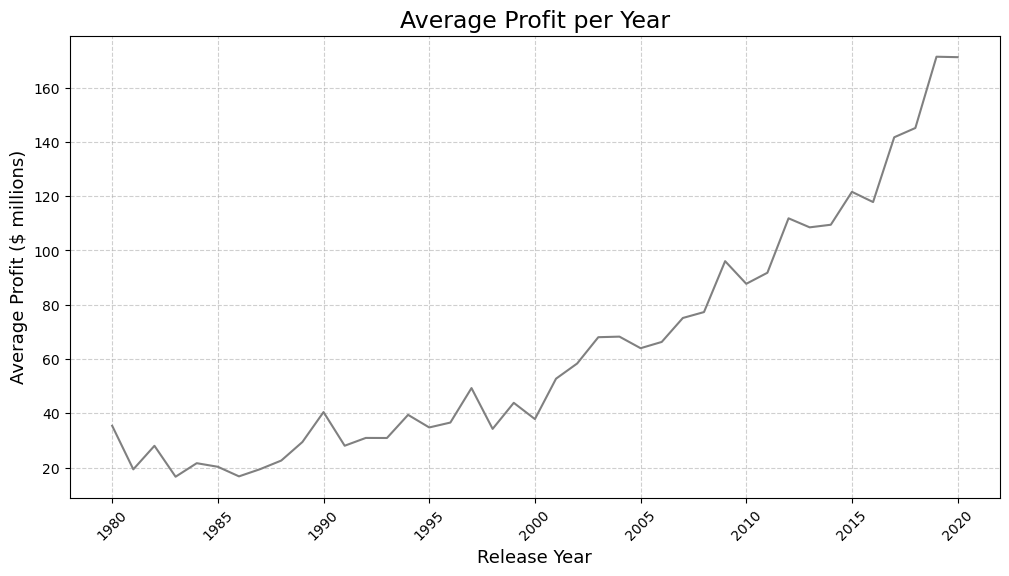

In [35]:
#Average profit that movie industry had each year since 1980
#Group by year
avg_profit_per_year = df1.groupby('release_year')[['profit']].mean()

#Plot
plt.figure(figsize=(12,6))
plt.plot(avg_profit_per_year.index, avg_profit_per_year['profit']/1e6, color='grey')
    
plt.xlabel("Release Year",fontsize=13)
plt.ylabel("Average Profit ($ millions)",fontsize=13)
plt.title("Average Profit per Year",fontsize=17)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



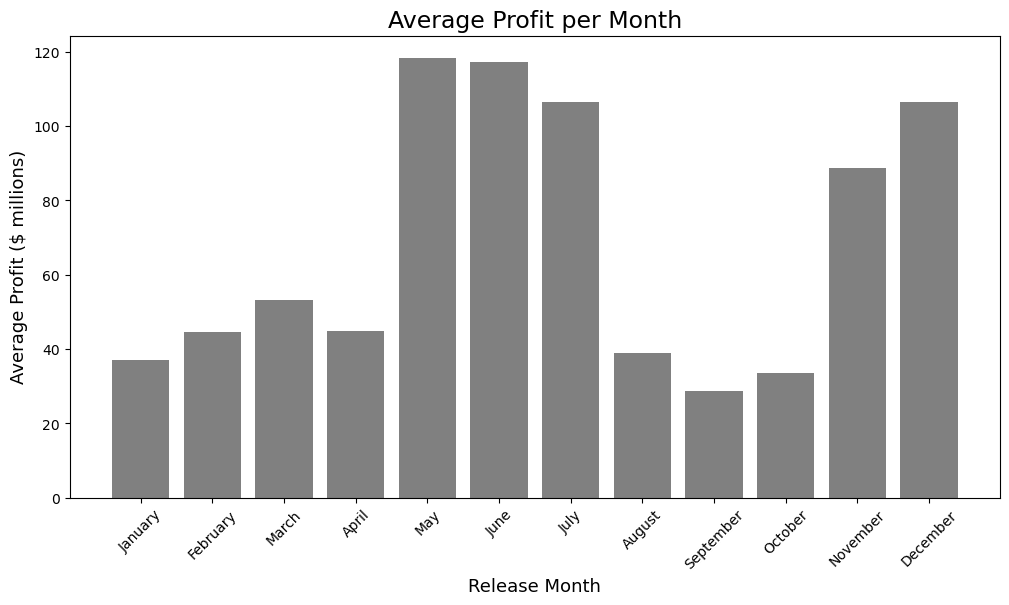

In [36]:
#Plot average profit of movie industry by month

# Group by month
avg_profit_per_month = df1.groupby('release_month')[['profit']].mean().reset_index()

# Use categorical type to enforce calendar order
months_ordered = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

avg_profit_per_month['release_month'] = pd.Categorical(
    avg_profit_per_month['release_month'], 
    categories=months_ordered, 
    ordered=True
)

# Sort by the defined order
avg_profit_per_month = avg_profit_per_month.sort_values('release_month')

# Plot
plt.figure(figsize=(12,6))
plt.bar(avg_profit_per_month['release_month'], avg_profit_per_month['profit']/1e6, color='grey')

plt.xlabel("Release Month", fontsize=13)
plt.ylabel("Average Profit ($ millions)", fontsize=13)
plt.title("Average Profit per Month", fontsize=17)
plt.xticks(rotation=45)
plt.show()

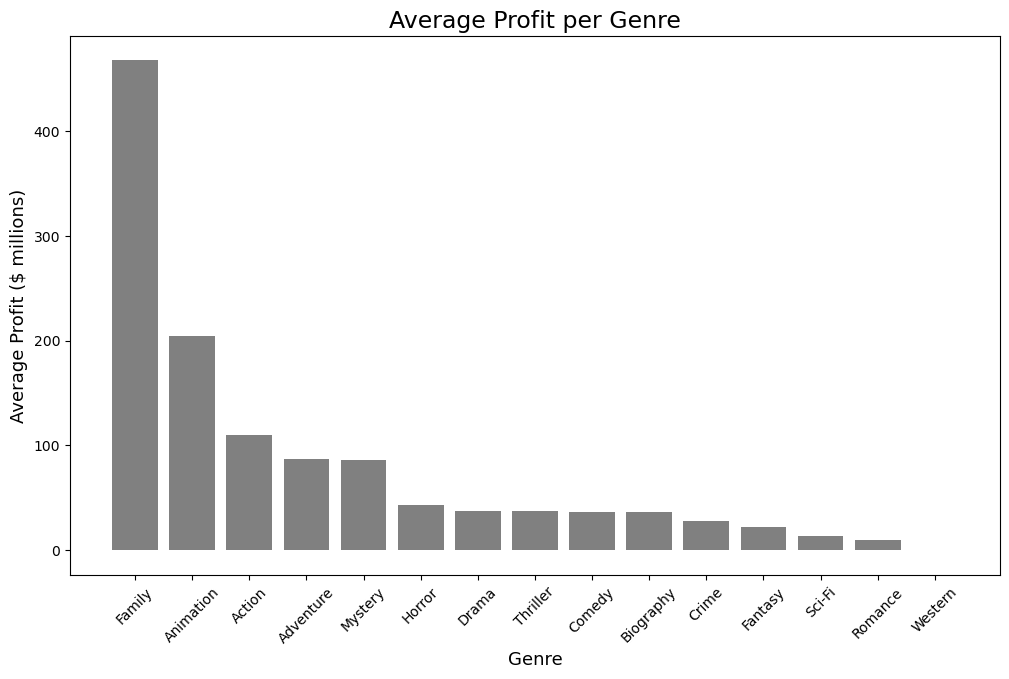

In [37]:
#Average profit of each genre
avg_profit_per_genre = df1.groupby('genre')[['profit']].mean().sort_values(by='profit', ascending=False)

#Plot
plt.figure(figsize=(12,7))
plt.bar(avg_profit_per_genre.index, avg_profit_per_genre['profit']/1e6, color='grey')

plt.xlabel('Genre', fontsize=13)
plt.ylabel('Average Profit ($ millions)',fontsize=13)
plt.title('Average Profit per Genre',fontsize=17)
plt.xticks(rotation=45)
plt.show()

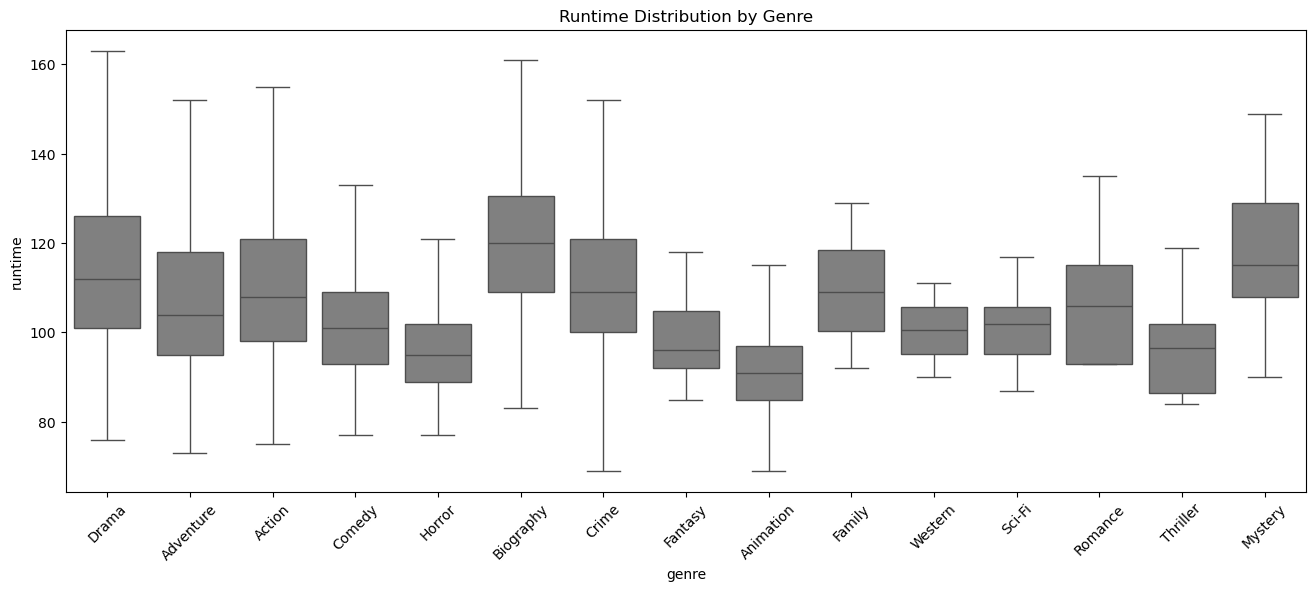

In [38]:
#Runtime of each Genre
plt.figure(figsize=(16,6))
sns.boxplot(x='genre', y='runtime', data=df1, showfliers=False, color= 'grey')
plt.xticks(rotation=45)
plt.title("Runtime Distribution by Genre")
plt.show()

### Hypothesis Test (Do High-Budget Movies Have Higher ROI?)

In [39]:
#Null Hypothesis (H₀): High-budget movies do not have higher ROI than low-budget movies.

#Alternative Hypothesis (H₁): High-budget movies have higher ROI than low-budget movies.

#Significant value = 0.05

In [40]:
# Split data into high-budget and low-budget groups
median_budget = df1['budget'].median()
high_budget = df1[df1['budget'] >= median_budget]['roi']
low_budget = df1[df1['budget'] < median_budget]['roi']


In [41]:
# Run two-sided test first
t_stat, p_val_two_sided = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print("T-statistic:", t_stat)
print("Two-sided P-value:", p_val_two_sided)

T-statistic: -1.6478561523049002
Two-sided P-value: 0.09949913133452995


In [42]:
# Convert to one-sided p-value
if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print("One-sided P-value:", p_val_one_sided)

One-sided P-value: 0.950250434332735


In [43]:
#Result
if p_val_one_sided < 0.05:
    print("Reject H₀ → High-budget movies earn significantly more ROI than low-budget movies.")
else:
    print("Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.")

Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.


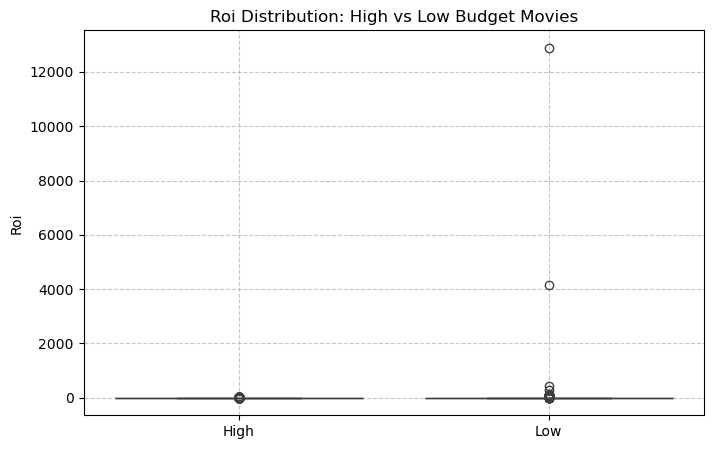

In [44]:
#Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=['High']*len(high_budget) + ['Low']*len(low_budget), 
            y=pd.concat([high_budget, low_budget]))
plt.title("Roi Distribution: High vs Low Budget Movies")
plt.ylabel("Roi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Interpretation: 
##### We fail to reject H₀. There is no statistical evidence that high-budget movies earn higher ROI than low-budget movies. In fact, the negative t-statistic indicates that the mean ROI for high-budget films is slightly lower, though not significantly so.
#### Conclusion:
##### High-budget movies may bring larger absolute profits, but ROI efficiency is not higher than low-budget films.

In [659]:
df1.to_excel("cleaned_movies.xlsx", index=False)

In [660]:
import os

print(os.getcwd())

C:\Users\ajoal
